# School Expulsion Data Exploration

In this notebook I will be exploring and joining 2 datasets from the California Department of Education. The first dataset is school expulsion data listing expulsions for each school, which is the 'substantive' dataset, which doesn't contain any geometry. The second dataset contains the geometry data, in the form of angular latitude and longitude coordinates. I will ultimately be merging both together by a shared attribute 'school code.' I have pre-filtered both datasets to only include schools located within L.A. County before importing into Jupyter Notebooks.


## School Expulsion Data

This data from the California Department of Education can be found [here](https://www.cde.ca.gov/ds/ad/filesed.asp), and its documentation can be found [here](https://www.cde.ca.gov/ds/ad/fsed.asp). I have pre-filtered this dataset the reporting category 'TA' before importing into Jupyter Notebooks.

Steps:
* look at the data
* clean the data, including adding a CDSCode column to the School Expulsion Data
* filter the data

### Looking at the Data

In [123]:
# first, import the pandas library
import geopandas as gpd

# next, import the school expulsion data
expgdf = gpd.read_file('exp1920_LA.csv')

In [91]:
expgdf.head()

,AcademicYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,...,Unduplicated Count of Students Expelled (Total),Unduplicated Count of Students Expelled (Defiance-Only),Expulsion Rate (Total),Expulsion Count Violent Incident (Injury),Expulsion Count Violent Incident (No Injury),Expulsion Count Weapons Possession,Expulsion Count Illicit Drug-Related,Expulsion Count Defiance-Only,Expulsion Count Other Reasons,geometry
0,2019-20,S,19,64212,1995596,Los Angeles,ABC Unified,ABC Secondary (Alternative),No,TA,...,0,0,0,0,0,0,0,0,0,None
1,2019-20,S,19,64212,6010862,Los Angeles,ABC Unified,Aloha Elementary,No,TA,...,0,0,0,0,0,0,0,0,0,None
2,2019-20,S,19,64212,1930361,Los Angeles,ABC Unified,Artesia High,No,TA,...,0,0,0,0,0,0,0,0,0,None
3,2019-20,S,19,64212,6071369,Los Angeles,ABC Unified,Bragg Elementary,No,TA,...,0,0,0,0,0,0,0,0,0,None
4,2019-20,S,19,64212,6010953,Los Angeles,ABC Unified,Burbank (Luther) Elementary,No,TA,...,0,0,0,0,0,0,0,0,0,None


In [92]:
# check the column names
expgdf.columns

Index(['AcademicYear', 'AggregateLevel', 'CountyCode', 'DistrictCode',
       'SchoolCode', 'CountyName', 'DistrictName', 'SchoolName', 'CharterYN',
       'ReportingCategory', 'CumulativeEnrollment', 'Total Expulsions',
       'Unduplicated Count of Students Expelled (Total)',
       'Unduplicated Count of Students Expelled (Defiance-Only)',
       'Expulsion Rate (Total)', 'Expulsion Count Violent Incident (Injury)',
       'Expulsion Count Violent Incident (No Injury)',
       'Expulsion Count Weapons Possession',
       'Expulsion Count Illicit Drug-Related', 'Expulsion Count Defiance-Only',
       'Expulsion Count Other Reasons', 'geometry'],
      dtype='object')

In [93]:
# check the types of each column
expgdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 22 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   AcademicYear                                             2310 non-null   object  
 1   AggregateLevel                                           2310 non-null   object  
 2   CountyCode                                               2310 non-null   object  
 3   DistrictCode                                             2310 non-null   object  
 4   SchoolCode                                               2310 non-null   object  
 5   CountyName                                               2310 non-null   object  
 6   DistrictName                                             2310 non-null   object  
 7   SchoolName                                               2310 non-null   object  
 8   CharterYN 

### Clean the Data

In [94]:
# add a column that concatenates the County Code, District Code, and School Code to get a new 'CDSCode' that will match the other dataset.
expgdf['CDSCode'] = expgdf['CountyCode'] + expgdf['DistrictCode'] + expgdf['SchoolCode']

expgdf.info()
expgdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 23 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   AcademicYear                                             2310 non-null   object  
 1   AggregateLevel                                           2310 non-null   object  
 2   CountyCode                                               2310 non-null   object  
 3   DistrictCode                                             2310 non-null   object  
 4   SchoolCode                                               2310 non-null   object  
 5   CountyName                                               2310 non-null   object  
 6   DistrictName                                             2310 non-null   object  
 7   SchoolName                                               2310 non-null   object  
 8   CharterYN 

,AcademicYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,...,Unduplicated Count of Students Expelled (Defiance-Only),Expulsion Rate (Total),Expulsion Count Violent Incident (Injury),Expulsion Count Violent Incident (No Injury),Expulsion Count Weapons Possession,Expulsion Count Illicit Drug-Related,Expulsion Count Defiance-Only,Expulsion Count Other Reasons,geometry,CDSCode
0,2019-20,S,19,64212,1995596,Los Angeles,ABC Unified,ABC Secondary (Alternative),No,TA,...,0,0,0,0,0,0,0,0,None,19642121995596
1,2019-20,S,19,64212,6010862,Los Angeles,ABC Unified,Aloha Elementary,No,TA,...,0,0,0,0,0,0,0,0,None,19642126010862
2,2019-20,S,19,64212,1930361,Los Angeles,ABC Unified,Artesia High,No,TA,...,0,0,0,0,0,0,0,0,None,19642121930361
3,2019-20,S,19,64212,6071369,Los Angeles,ABC Unified,Bragg Elementary,No,TA,...,0,0,0,0,0,0,0,0,None,19642126071369
4,2019-20,S,19,64212,6010953,Los Angeles,ABC Unified,Burbank (Luther) Elementary,No,TA,...,0,0,0,0,0,0,0,0,None,19642126010953


In [95]:
# expulsion counts and CDSCode should be expressed as int
int_indices = [11,12,13,15,16,17,18,19,20,22]
for x in int_indices:
    expgdf.iloc[:,x] = expgdf.iloc[:,x].astype(int)
    
# expulsion rate should be expressed as a float
expgdf.iloc[:,14] = expgdf.iloc[:,14].astype(float)

expgdf.dtypes

AcademicYear                                                 object
AggregateLevel                                               object
CountyCode                                                   object
DistrictCode                                                 object
SchoolCode                                                   object
CountyName                                                   object
DistrictName                                                 object
SchoolName                                                   object
CharterYN                                                    object
ReportingCategory                                            object
CumulativeEnrollment                                         object
Total Expulsions                                              int64
Unduplicated Count of Students Expelled (Total)               int64
Unduplicated Count of Students Expelled (Defiance-Only)       int64
Expulsion Rate (Total)                          

### Filter the Data
Now that our data is appropriately typed, we can filter them based on value.

In [96]:
# Only include data for schools with expulsions greater than 0.
expgdf_filtered = expgdf[expgdf['Total Expulsions']>0]
expgdf_filtered.reset_index(inplace = True)
expgdf_filtered.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 24 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   index                                                    154 non-null    int64   
 1   AcademicYear                                             154 non-null    object  
 2   AggregateLevel                                           154 non-null    object  
 3   CountyCode                                               154 non-null    object  
 4   DistrictCode                                             154 non-null    object  
 5   SchoolCode                                               154 non-null    object  
 6   CountyName                                               154 non-null    object  
 7   DistrictName                                             154 non-null    object  
 8   SchoolName  

Notice this filtering reduced the overall number of entries from 2310 to 154!

In [97]:
# filter the columns
new_columns = ['DistrictName', 'SchoolName', 'CharterYN',
       'ReportingCategory', 'CumulativeEnrollment', 'Total Expulsions',
       'Unduplicated Count of Students Expelled (Total)',
       'Unduplicated Count of Students Expelled (Defiance-Only)',
       'Expulsion Rate (Total)', 'Expulsion Count Violent Incident (Injury)',
       'Expulsion Count Violent Incident (No Injury)',
       'Expulsion Count Weapons Possession',
       'Expulsion Count Illicit Drug-Related', 'Expulsion Count Defiance-Only',
       'Expulsion Count Other Reasons', 'geometry','CDSCode']

expgdf_filtered = expgdf_filtered[new_columns]
expgdf_filtered.head()

,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,Total Expulsions,Unduplicated Count of Students Expelled (Total),Unduplicated Count of Students Expelled (Defiance-Only),Expulsion Rate (Total),Expulsion Count Violent Incident (Injury),Expulsion Count Violent Incident (No Injury),Expulsion Count Weapons Possession,Expulsion Count Illicit Drug-Related,Expulsion Count Defiance-Only,Expulsion Count Other Reasons,geometry,CDSCode
0,Alhambra Unified,Alhambra High,No,TA,2426,4,4,0,0.2,2,0,1,1,0,0,None,19757131930163
1,Alhambra Unified,Mark Keppel High,No,TA,2312,1,1,0,0.0,0,0,0,0,0,1,None,19757131934553
2,Alhambra Unified,San Gabriel High,No,TA,2094,7,7,0,0.3,0,7,0,0,0,0,None,19757131937697
3,Antelope Valley Union High,Antelope Valley High,No,TA,1809,4,4,0,0.2,1,1,2,0,0,0,None,19642461930213
4,Antelope Valley Union High,Eastside High,No,TA,2798,2,2,0,0.1,0,1,1,0,0,0,None,1964246108407


## School Directory Data

This [dataset](https://www.cde.ca.gov/ds/si/ds/pubschls.asp ), also provided by the CA Department of Education, contains information about each school in the dataset - importantly, it contains the latitude and longitude! The documentation can be found [here](https://www.cde.ca.gov/ds/si/ds/fspubschls.asp).

### Looking at the Data

In [98]:
# next, import the school directory data
schoolgdf = gpd.read_file('pubschls_LA.csv')

schoolgdf.info()
schoolgdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CDSCode               3722 non-null   object  
 1   NCESDist              3722 non-null   object  
 2   NCESSchool            3722 non-null   object  
 3   StatusType            3722 non-null   object  
 4   County                3722 non-null   object  
 5   District              3722 non-null   object  
 6   School                3722 non-null   object  
 7   Street                3722 non-null   object  
 8   StreetAbr             3722 non-null   object  
 9   City                  3722 non-null   object  
 10  Zip                   3722 non-null   object  
 11  State                 3722 non-null   object  
 12  MailStreet            3722 non-null   object  
 13  MailStrAbr            3722 non-null   object  
 14  MailCity              3722 non-null   object  
 

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,geometry
0,19101990000000,0691078,No Data,Active,Los Angeles,Los Angeles County Office of Education,No Data,9300 Imperial Highway,9300 Imperial Hwy.,Downey,...,No Data,No Data,No Data,33.916978,-118.12860,Debra,Duardo,duardo_debra@lacoe.edu,4/2/2019,None
1,19101990100776,0691078,11339,Active,Los Angeles,Los Angeles County Office of Education,North Valley Military Institute College Prepar...,12105 Allegheny Street,12105 Allegheny St.,Sun Valley,...,N,N,0601564,34.234622,-118.39656,Mark,Ryan,mryan@novamil.org,8/13/2020,None
2,19101990102145,0691078,11343,Closed,Los Angeles,Los Angeles County Office of Education,Progressive Education Entrepreneurial Charter,2600 South LaBrea Avenue,2600 South LaBrea Ave.,Los Angeles,...,No Data,Y,No Data,No Data,No Data,No Data,No Data,No Data,1/30/2009,None
3,19101990106880,0691078,10853,Active,Los Angeles,Los Angeles County Office of Education,Jardin de la Infancia,"1400 S Broadway Los Angeles, CA 90015","1400 S Broadway Los Angeles, CA 90015",Los Angeles,...,N,N,0602019,34.035321,-118.26241,Zuzy,Chavez,jardindelainfancia@me.com,8/31/2021,None
4,19101990109660,0691078,10891,Active,Los Angeles,Los Angeles County Office of Education,Aspire Antonio Maria Lugo Academy,6100 Carmelita Avenue,6100 Carmelita Ave.,Huntington Park,...,N,N,0601821,33.984203,-118.19659,Dawn,Barnes,data-contact@aspirepublicschools.org,12/30/2020,None


### Cleaning the Data

In [99]:
# CDS Code in row 0 should be expressed as an int so we can eventually compare and join with the other dataset
schoolgdf.iloc[:,0] = schoolgdf.iloc[:,0].astype(int)

In [100]:
import numpy as np

# replace all 'No Data' entries as NaN
schoolgdf_cleaned = schoolgdf.replace('No Data',np.NaN)

# convert the Lat & Lon to values so they can be used for geometry
schoolgdf_cleaned['Longitude'] = schoolgdf_cleaned['Longitude'].astype(float)
schoolgdf_cleaned['Latitude'] = schoolgdf_cleaned['Latitude'].astype(float)

# now check that there are null values, and that they are represented in the Lat & Lon columns
schoolgdf_cleaned.info()
schoolgdf_cleaned.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CDSCode               3722 non-null   int64   
 1   NCESDist              3349 non-null   object  
 2   NCESSchool            2714 non-null   object  
 3   StatusType            3722 non-null   object  
 4   County                3722 non-null   object  
 5   District              3722 non-null   object  
 6   School                3594 non-null   object  
 7   Street                3670 non-null   object  
 8   StreetAbr             3670 non-null   object  
 9   City                  3670 non-null   object  
 10  Zip                   3670 non-null   object  
 11  State                 3670 non-null   object  
 12  MailStreet            3670 non-null   object  
 13  MailStrAbr            3670 non-null   object  
 14  MailCity              3670 non-null   object  
 

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,geometry
0,19101990000000,0691078,NaN,Active,Los Angeles,Los Angeles County Office of Education,NaN,9300 Imperial Highway,9300 Imperial Hwy.,Downey,...,NaN,NaN,NaN,33.916978,-118.12860,Debra,Duardo,duardo_debra@lacoe.edu,4/2/2019,None
1,19101990100776,0691078,11339,Active,Los Angeles,Los Angeles County Office of Education,North Valley Military Institute College Prepar...,12105 Allegheny Street,12105 Allegheny St.,Sun Valley,...,N,N,0601564,34.234622,-118.39656,Mark,Ryan,mryan@novamil.org,8/13/2020,None
2,19101990102145,0691078,11343,Closed,Los Angeles,Los Angeles County Office of Education,Progressive Education Entrepreneurial Charter,2600 South LaBrea Avenue,2600 South LaBrea Ave.,Los Angeles,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,1/30/2009,None
3,19101990106880,0691078,10853,Active,Los Angeles,Los Angeles County Office of Education,Jardin de la Infancia,"1400 S Broadway Los Angeles, CA 90015","1400 S Broadway Los Angeles, CA 90015",Los Angeles,...,N,N,0602019,34.035321,-118.26241,Zuzy,Chavez,jardindelainfancia@me.com,8/31/2021,None
4,19101990109660,0691078,10891,Active,Los Angeles,Los Angeles County Office of Education,Aspire Antonio Maria Lugo Academy,6100 Carmelita Avenue,6100 Carmelita Ave.,Huntington Park,...,N,N,0601821,33.984203,-118.19659,Dawn,Barnes,data-contact@aspirepublicschools.org,12/30/2020,None


In [101]:
# populate column for geometry
schoolgdf_cleaned['geometry'] = gpd.points_from_xy(schoolgdf_cleaned.Longitude, schoolgdf_cleaned.Latitude)

# now the geometry points that are created from Lat/Lon will be [NaN Nan], which is an invalid geometry
# replace these invalid geometries with NaN
schoolgdf_cleaned['geometry'][~schoolgdf_cleaned['geometry'].is_valid]=np.NaN

# check that the same number of non-null lat/lon values are represented in the geometry column!
schoolgdf_cleaned.info()
schoolgdf_cleaned.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CDSCode               3722 non-null   int64   
 1   NCESDist              3349 non-null   object  
 2   NCESSchool            2714 non-null   object  
 3   StatusType            3722 non-null   object  
 4   County                3722 non-null   object  
 5   District              3722 non-null   object  
 6   School                3594 non-null   object  
 7   Street                3670 non-null   object  
 8   StreetAbr             3670 non-null   object  
 9   City                  3670 non-null   object  
 10  Zip                   3670 non-null   object  
 11  State                 3670 non-null   object  
 12  MailStreet            3670 non-null   object  
 13  MailStrAbr            3670 non-null   object  
 14  MailCity              3670 non-null   object  
 

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,geometry
0,19101990000000,0691078,NaN,Active,Los Angeles,Los Angeles County Office of Education,NaN,9300 Imperial Highway,9300 Imperial Hwy.,Downey,...,NaN,NaN,NaN,33.916978,-118.12860,Debra,Duardo,duardo_debra@lacoe.edu,4/2/2019,POINT (-118.12860 33.91698)
1,19101990100776,0691078,11339,Active,Los Angeles,Los Angeles County Office of Education,North Valley Military Institute College Prepar...,12105 Allegheny Street,12105 Allegheny St.,Sun Valley,...,N,N,0601564,34.234622,-118.39656,Mark,Ryan,mryan@novamil.org,8/13/2020,POINT (-118.39656 34.23462)
2,19101990102145,0691078,11343,Closed,Los Angeles,Los Angeles County Office of Education,Progressive Education Entrepreneurial Charter,2600 South LaBrea Avenue,2600 South LaBrea Ave.,Los Angeles,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,1/30/2009,None
3,19101990106880,0691078,10853,Active,Los Angeles,Los Angeles County Office of Education,Jardin de la Infancia,"1400 S Broadway Los Angeles, CA 90015","1400 S Broadway Los Angeles, CA 90015",Los Angeles,...,N,N,0602019,34.035321,-118.26241,Zuzy,Chavez,jardindelainfancia@me.com,8/31/2021,POINT (-118.26241 34.03532)
4,19101990109660,0691078,10891,Active,Los Angeles,Los Angeles County Office of Education,Aspire Antonio Maria Lugo Academy,6100 Carmelita Avenue,6100 Carmelita Ave.,Huntington Park,...,N,N,0601821,33.984203,-118.19659,Dawn,Barnes,data-contact@aspirepublicschools.org,12/30/2020,POINT (-118.19659 33.98420)


### Filtering the Data

only keep the columns we want!

In [102]:
# filter the columns
schoolgdf_cleaned.columns

Index(['CDSCode', 'NCESDist', 'NCESSchool', 'StatusType', 'County', 'District',
       'School', 'Street', 'StreetAbr', 'City', 'Zip', 'State', 'MailStreet',
       'MailStrAbr', 'MailCity', 'MailZip', 'MailState', 'Phone', 'Ext',
       'FaxNumber', 'Email', 'WebSite', 'OpenDate', 'ClosedDate', 'Charter',
       'CharterNum', 'FundingType', 'DOC', 'DOCType', 'SOC', 'SOCType',
       'EdOpsCode', 'EdOpsName', 'EILCode', 'EILName', 'GSoffered', 'GSserved',
       'Virtual', 'Magnet', 'YearRoundYN', 'FederalDFCDistrictID', 'Latitude',
       'Longitude', 'AdmFName', 'AdmLName', 'AdmEmail', 'LastUpDate',
       'geometry'],
      dtype='object')

In [103]:
# Now, filter out the schools that aren't active!
print(schoolgdf_cleaned.shape)
schoolgdf_filtered_cleaned = schoolgdf_cleaned[schoolgdf_cleaned['StatusType']=='Active']
print(schoolgdf_filtered_cleaned.shape)
schoolgdf_filtered_cleaned.head()

(3722, 48)
(2379, 48)


,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,geometry
0,19101990000000,0691078,NaN,Active,Los Angeles,Los Angeles County Office of Education,NaN,9300 Imperial Highway,9300 Imperial Hwy.,Downey,...,NaN,NaN,NaN,33.916978,-118.12860,Debra,Duardo,duardo_debra@lacoe.edu,4/2/2019,POINT (-118.12860 33.91698)
1,19101990100776,0691078,11339,Active,Los Angeles,Los Angeles County Office of Education,North Valley Military Institute College Prepar...,12105 Allegheny Street,12105 Allegheny St.,Sun Valley,...,N,N,0601564,34.234622,-118.39656,Mark,Ryan,mryan@novamil.org,8/13/2020,POINT (-118.39656 34.23462)
3,19101990106880,0691078,10853,Active,Los Angeles,Los Angeles County Office of Education,Jardin de la Infancia,"1400 S Broadway Los Angeles, CA 90015","1400 S Broadway Los Angeles, CA 90015",Los Angeles,...,N,N,0602019,34.035321,-118.26241,Zuzy,Chavez,jardindelainfancia@me.com,8/31/2021,POINT (-118.26241 34.03532)
4,19101990109660,0691078,10891,Active,Los Angeles,Los Angeles County Office of Education,Aspire Antonio Maria Lugo Academy,6100 Carmelita Avenue,6100 Carmelita Ave.,Huntington Park,...,N,N,0601821,33.984203,-118.19659,Dawn,Barnes,data-contact@aspirepublicschools.org,12/30/2020,POINT (-118.19659 33.98420)
6,19101990112128,0691078,11655,Active,Los Angeles,Los Angeles County Office of Education,Aspire Ollin University Preparatory Academy,2540 East 58th Street,2540 East 58th St.,Huntington Park,...,N,N,0601857,33.990154,-118.22653,Joel,Ramirez,data-contact@aspirepublicschools.org,8/13/2020,POINT (-118.22653 33.99015)


In [104]:
schoolgdf_filtered_cleaned = schoolgdf_cleaned

keep_columns = ['CDSCode', 'District',
       'School', 'Street', 'StreetAbr', 'City', 'Zip', 'State', 'MailStreet',
       'MailStrAbr', 'MailCity', 'MailZip', 'MailState', 'Email', 'WebSite', 'Charter',
       'CharterNum', 'FundingType', 'DOC', 'DOCType', 'SOC', 'SOCType',
       'EdOpsCode', 'EdOpsName', 'EILCode', 'EILName', 'GSoffered', 'GSserved',
       'Virtual', 'Magnet', 'YearRoundYN', 'FederalDFCDistrictID', 'Latitude',
       'Longitude', 'LastUpDate','geometry']
schoolgdf_filtered_cleaned = schoolgdf_filtered_cleaned[keep_columns]
schoolgdf_filtered_cleaned.head()

,CDSCode,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,...,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,LastUpDate,geometry
0,19101990000000,Los Angeles County Office of Education,NaN,9300 Imperial Highway,9300 Imperial Hwy.,Downey,90242-2890,CA,9300 Imperial Highway,9300 Imperial Hwy.,...,NaN,NaN,NaN,NaN,NaN,NaN,33.916978,-118.12860,4/2/2019,POINT (-118.12860 33.91698)
1,19101990100776,Los Angeles County Office of Education,North Valley Military Institute College Prepar...,12105 Allegheny Street,12105 Allegheny St.,Sun Valley,91352,CA,"8309 Laurel Canyon Boulevard, #295","8309 Laurel Canyon Blvd., #295",...,6-12,6-12,C,N,N,0601564,34.234622,-118.39656,8/13/2020,POINT (-118.39656 34.23462)
2,19101990102145,Los Angeles County Office of Education,Progressive Education Entrepreneurial Charter,2600 South LaBrea Avenue,2600 South LaBrea Ave.,Los Angeles,90016,CA,2600 S. La Brea Avenue,2600 S. La Brea Ave.,...,6-12,6-10,NaN,NaN,Y,NaN,NaN,NaN,1/30/2009,None
3,19101990106880,Los Angeles County Office of Education,Jardin de la Infancia,"1400 S Broadway Los Angeles, CA 90015","1400 S Broadway Los Angeles, CA 90015",Los Angeles,90015-2209,CA,"1400 S Broadway Los Angeles, CA 90015","1400 S Broadway Los Angeles, CA 90015",...,K-1,K-1,N,N,N,0602019,34.035321,-118.26241,8/31/2021,POINT (-118.26241 34.03532)
4,19101990109660,Los Angeles County Office of Education,Aspire Antonio Maria Lugo Academy,6100 Carmelita Avenue,6100 Carmelita Ave.,Huntington Park,90255-4138,CA,"1001 22nd Avenue, Suite 100","1001 22nd Ave., Ste. 100",...,K-6,K-5,N,N,N,0601821,33.984203,-118.19659,12/30/2020,POINT (-118.19659 33.98420)


I'm intentionally keeping some of the columns that will have redundant data when combined with the first dataset, so that I can do a spot check to verify the join. However, I do want to be able to differentiate these columns, so I'll rename them for clarity.

In [105]:
renamed_columns = ['CDSCode', 'Directory_District',
       'Directory_School', 'Street', 'StreetAbr', 'City', 'Zip', 'State', 'MailStreet',
       'MailStrAbr', 'MailCity', 'MailZip', 'MailState', 'Email', 'WebSite', 'Directory_Charter',
       'CharterNum', 'FundingType', 'DOC', 'DOCType', 'SOC', 'SOCType',
       'EdOpsCode', 'EdOpsName', 'EILCode', 'EILName', 'GSoffered', 'GSserved',
       'Virtual', 'Magnet', 'YearRoundYN', 'FederalDFCDistrictID', 'Latitude',
       'Longitude', 'LastUpDate','geometry']

schoolgdf_filtered_cleaned.columns = renamed_columns;
schoolgdf_filtered_cleaned.head()

,CDSCode,Directory_District,Directory_School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,...,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,LastUpDate,geometry
0,19101990000000,Los Angeles County Office of Education,NaN,9300 Imperial Highway,9300 Imperial Hwy.,Downey,90242-2890,CA,9300 Imperial Highway,9300 Imperial Hwy.,...,NaN,NaN,NaN,NaN,NaN,NaN,33.916978,-118.12860,4/2/2019,POINT (-118.12860 33.91698)
1,19101990100776,Los Angeles County Office of Education,North Valley Military Institute College Prepar...,12105 Allegheny Street,12105 Allegheny St.,Sun Valley,91352,CA,"8309 Laurel Canyon Boulevard, #295","8309 Laurel Canyon Blvd., #295",...,6-12,6-12,C,N,N,0601564,34.234622,-118.39656,8/13/2020,POINT (-118.39656 34.23462)
2,19101990102145,Los Angeles County Office of Education,Progressive Education Entrepreneurial Charter,2600 South LaBrea Avenue,2600 South LaBrea Ave.,Los Angeles,90016,CA,2600 S. La Brea Avenue,2600 S. La Brea Ave.,...,6-12,6-10,NaN,NaN,Y,NaN,NaN,NaN,1/30/2009,None
3,19101990106880,Los Angeles County Office of Education,Jardin de la Infancia,"1400 S Broadway Los Angeles, CA 90015","1400 S Broadway Los Angeles, CA 90015",Los Angeles,90015-2209,CA,"1400 S Broadway Los Angeles, CA 90015","1400 S Broadway Los Angeles, CA 90015",...,K-1,K-1,N,N,N,0602019,34.035321,-118.26241,8/31/2021,POINT (-118.26241 34.03532)
4,19101990109660,Los Angeles County Office of Education,Aspire Antonio Maria Lugo Academy,6100 Carmelita Avenue,6100 Carmelita Ave.,Huntington Park,90255-4138,CA,"1001 22nd Avenue, Suite 100","1001 22nd Ave., Ste. 100",...,K-6,K-5,N,N,N,0601821,33.984203,-118.19659,12/30/2020,POINT (-118.19659 33.98420)


### Mapping the data

In [106]:
# import libraries for mapping
import contextily as ctx
import matplotlib.pyplot as plt

In [107]:
# Set the CRS
schoolgdf_filtered_cleaned.set_crs(epsg=4326, inplace=True)
schoolgdf_filtered_cleaned.crs

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

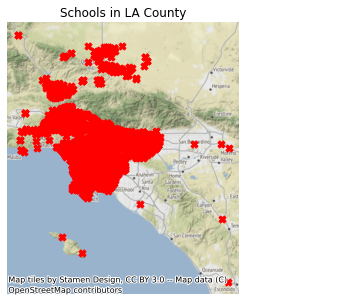

In [108]:
# reproject to web mercator
schoolgdf_web_mercator = schoolgdf_filtered_cleaned.to_crs(epsg=3857)

# map it
fig, ax = plt.subplots(figsize=(15,5))

schoolgdf_web_mercator.plot(ax=ax, 
                      marker='X',
                      markersize=50,
                      color='red')

ax.axis('off')

ax.set_title('Schools in LA County')

ctx.add_basemap(ax)

So much red! Oh well, once I join the data it should be filtered down to just the schools that have expulsions.

## Joining the Data

And finally, I will be merging the two datasets.
* join the datasets by attribute: CDSCode
* map the combined data

In [109]:
expgdf_filtered.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 17 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   DistrictName                                             154 non-null    object  
 1   SchoolName                                               154 non-null    object  
 2   CharterYN                                                154 non-null    object  
 3   ReportingCategory                                        154 non-null    object  
 4   CumulativeEnrollment                                     154 non-null    object  
 5   Total Expulsions                                         154 non-null    int64   
 6   Unduplicated Count of Students Expelled (Total)          154 non-null    int64   
 7   Unduplicated Count of Students Expelled (Defiance-Only)  154 non-null    int64   
 8   Expulsion Ra

In [110]:
# reminder of what the datasets look like
schoolgdf_filtered_cleaned.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CDSCode               3722 non-null   int64   
 1   Directory_District    3722 non-null   object  
 2   Directory_School      3594 non-null   object  
 3   Street                3670 non-null   object  
 4   StreetAbr             3670 non-null   object  
 5   City                  3670 non-null   object  
 6   Zip                   3670 non-null   object  
 7   State                 3670 non-null   object  
 8   MailStreet            3670 non-null   object  
 9   MailStrAbr            3670 non-null   object  
 10  MailCity              3670 non-null   object  
 11  MailZip               3670 non-null   object  
 12  MailState             3670 non-null   object  
 13  Email                 500 non-null    object  
 14  WebSite               1898 non-null   object  
 

In [111]:

expgdf_filtered_final = expgdf_filtered
schoolgdf_final = schoolgdf_filtered_cleaned

print(schoolgdf_filtered_cleaned.shape)
print(expgdf_filtered_final.shape)

expgdf_filtered_final = expgdf_filtered_final.merge(schoolgdf_filtered_cleaned, on='CDSCode')

print(schoolgdf_filtered_cleaned.shape)
print(expgdf_filtered_final.shape)

# reminder of what the datasets look like
expgdf_filtered_final.info()

(3722, 36)
(154, 17)
(3722, 36)
(105, 52)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 52 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   DistrictName                                             105 non-null    object  
 1   SchoolName                                               105 non-null    object  
 2   CharterYN                                                105 non-null    object  
 3   ReportingCategory                                        105 non-null    object  
 4   CumulativeEnrollment                                     105 non-null    object  
 5   Total Expulsions                                         105 non-null    int64   
 6   Unduplicated Count of Students Expelled (Total)          105 non-null    int64   
 7   Unduplicated Count of Students Expelled (Defiance-Only)  105 non-

### Checking the Merge

I thought that surely all of the values in the expulsion filtered dataset would be represented in the school directory. However, that wasn't the case! As you can see from the output above, the number of entries was reduced from 154 to 105. We lost about 50 data entries in the merge. I did a couple of checks to make sure that the merge generally went smoothly


In [112]:
# do a spot check with duplicate rows to make sure that the school names are identical between the school directory and the expulsion dataset
print("\n****School Name****\n")
print(expgdf_filtered_final.iloc[:,1])
print(expgdf_filtered_final.iloc[:,18])
print("\n****District Name****\n")
print(expgdf_filtered_final.iloc[:,0])
print(expgdf_filtered_final.iloc[:,17])
print("\n****Charter****\n")
print(expgdf_filtered_final.iloc[:,2])
print(expgdf_filtered_final.iloc[:,31])


****School Name****

0                     Alhambra High
1                  Mark Keppel High
2                  San Gabriel High
3              Antelope Valley High
4                     Highland High
                   ...             
100    Frontier High (Continuation)
101                   La Serna High
102                    Pioneer High
103                   Santa Fe High
104                   Whittier High
Name: SchoolName, Length: 105, dtype: object
0                     Alhambra High
1                  Mark Keppel High
2                  San Gabriel High
3              Antelope Valley High
4                     Highland High
                   ...             
100    Frontier High (Continuation)
101                   La Serna High
102                    Pioneer High
103                   Santa Fe High
104                   Whittier High
Name: Directory_School, Length: 105, dtype: object

****District Name****

0                Alhambra Unified
1                Alhambra Unifie

In [113]:
# I then inspected the datatypes and first few entries.
expgdf_filtered_final.info()
expgdf_filtered_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 52 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   DistrictName                                             105 non-null    object  
 1   SchoolName                                               105 non-null    object  
 2   CharterYN                                                105 non-null    object  
 3   ReportingCategory                                        105 non-null    object  
 4   CumulativeEnrollment                                     105 non-null    object  
 5   Total Expulsions                                         105 non-null    int64   
 6   Unduplicated Count of Students Expelled (Total)          105 non-null    int64   
 7   Unduplicated Count of Students Expelled (Defiance-Only)  105 non-null    int64   
 8   Expulsion Rate (Tota

,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,Total Expulsions,Unduplicated Count of Students Expelled (Total),Unduplicated Count of Students Expelled (Defiance-Only),Expulsion Rate (Total),Expulsion Count Violent Incident (Injury),...,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,LastUpDate,geometry_y
0,Alhambra Unified,Alhambra High,No,TA,2426,4,4,0,0.2,2,...,9-12,9-12,C,N,N,NaN,34.095262,-118.12970,8/13/2020,POINT (-118.12970 34.09526)
1,Alhambra Unified,Mark Keppel High,No,TA,2312,1,1,0,0.0,0,...,9-12,9-12,C,N,N,NaN,34.069864,-118.11535,8/13/2020,POINT (-118.11535 34.06986)
2,Alhambra Unified,San Gabriel High,No,TA,2094,7,7,0,0.3,0,...,9-12,9-12,C,N,N,NaN,34.091924,-118.10802,8/13/2020,POINT (-118.10802 34.09192)
3,Antelope Valley Union High,Antelope Valley High,No,TA,1809,4,4,0,0.2,1,...,9-12,9-12,N,Y,N,NaN,34.699110,-118.13034,8/13/2020,POINT (-118.13034 34.69911)
4,Antelope Valley Union High,Highland High,No,TA,3015,9,9,0,0.3,6,...,9-12,9-12,N,Y,N,NaN,34.585226,-118.17400,8/13/2020,POINT (-118.17400 34.58523)


In [114]:
# delete some columns
filtered_columns = ['DistrictName', 'SchoolName', 'CharterYN', 'ReportingCategory',
       'CumulativeEnrollment', 'Total Expulsions',
       'Unduplicated Count of Students Expelled (Total)',
       'Unduplicated Count of Students Expelled (Defiance-Only)',
       'Expulsion Rate (Total)', 'Expulsion Count Violent Incident (Injury)',
       'Expulsion Count Violent Incident (No Injury)',
       'Expulsion Count Weapons Possession',
       'Expulsion Count Illicit Drug-Related', 'Expulsion Count Defiance-Only',
       'Expulsion Count Other Reasons', 'CDSCode', 'Street', 'StreetAbr', 'City',
       'Zip', 'State', 'MailStreet', 'MailStrAbr', 'MailCity', 'MailZip',
       'MailState', 'DOC', 'DOCType', 'SOC', 'SOCType', 'EdOpsCode',
       'EdOpsName', 'EILCode', 'EILName', 'GSoffered', 'GSserved', 'Virtual',
       'Magnet', 'YearRoundYN', 'Latitude', 'Longitude', 'LastUpDate','geometry_y']

expgdf_filtered_final = expgdf_filtered_final[filtered_columns]

renamed_columns = ['DistrictName', 'SchoolName', 'CharterYN', 'ReportingCategory',
       'CumulativeEnrollment', 'Total Expulsions',
       'Unduplicated Count of Students Expelled (Total)',
       'Unduplicated Count of Students Expelled (Defiance-Only)',
       'Expulsion Rate (Total)', 'Expulsion Count Violent Incident (Injury)',
       'Expulsion Count Violent Incident (No Injury)',
       'Expulsion Count Weapons Possession',
       'Expulsion Count Illicit Drug-Related', 'Expulsion Count Defiance-Only',
       'Expulsion Count Other Reasons', 'CDSCode','Street', 'StreetAbr', 'City',
       'Zip', 'State', 'MailStreet', 'MailStrAbr', 'MailCity', 'MailZip',
       'MailState', 'DOC', 'DOCType', 'SOC', 'SOCType', 'EdOpsCode',
       'EdOpsName', 'EILCode', 'EILName', 'GSoffered', 'GSserved', 'Virtual',
       'Magnet', 'YearRoundYN', 'Latitude', 'Longitude', 'LastUpDate','geometry']

expgdf_filtered_final.columns = renamed_columns
expgdf_filtered_final.head()

,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,Total Expulsions,Unduplicated Count of Students Expelled (Total),Unduplicated Count of Students Expelled (Defiance-Only),Expulsion Rate (Total),Expulsion Count Violent Incident (Injury),...,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,Latitude,Longitude,LastUpDate,geometry
0,Alhambra Unified,Alhambra High,No,TA,2426,4,4,0,0.2,2,...,High School,9-12,9-12,C,N,N,34.095262,-118.12970,8/13/2020,POINT (-118.12970 34.09526)
1,Alhambra Unified,Mark Keppel High,No,TA,2312,1,1,0,0.0,0,...,High School,9-12,9-12,C,N,N,34.069864,-118.11535,8/13/2020,POINT (-118.11535 34.06986)
2,Alhambra Unified,San Gabriel High,No,TA,2094,7,7,0,0.3,0,...,High School,9-12,9-12,C,N,N,34.091924,-118.10802,8/13/2020,POINT (-118.10802 34.09192)
3,Antelope Valley Union High,Antelope Valley High,No,TA,1809,4,4,0,0.2,1,...,High School,9-12,9-12,N,Y,N,34.699110,-118.13034,8/13/2020,POINT (-118.13034 34.69911)
4,Antelope Valley Union High,Highland High,No,TA,3015,9,9,0,0.3,6,...,High School,9-12,9-12,N,Y,N,34.585226,-118.17400,8/13/2020,POINT (-118.17400 34.58523)


In [115]:
type(expgdf_filtered_final)

pandas.core.frame.DataFrame

I found out that the type was actually a regular dataframe, I had to convert it to a GeoDataFrame.

In [116]:
from geopandas import GeoDataFrame
schoolgdf_final = GeoDataFrame(expgdf_filtered_final, crs="EPSG:4326", geometry='geometry')

# Mapping!

Now I use matplotlib and plotly express to visualize the joineddataset.

## Matplotlib

In [117]:
# First, get a reminder of the column names.
schoolgdf_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 43 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   DistrictName                                             105 non-null    object  
 1   SchoolName                                               105 non-null    object  
 2   CharterYN                                                105 non-null    object  
 3   ReportingCategory                                        105 non-null    object  
 4   CumulativeEnrollment                                     105 non-null    object  
 5   Total Expulsions                                         105 non-null    int64   
 6   Unduplicated Count of Students Expelled (Total)          105 non-null    int64   
 7   Unduplicated Count of Students Expelled (Defiance-Only)  105 non-null    int64   
 8   Expulsion Ra

epsg:4326


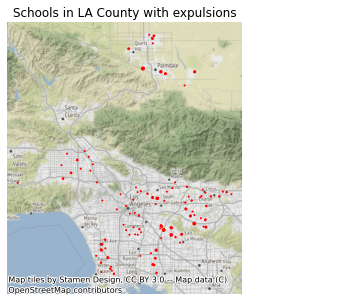

In [118]:
#Then, plot!

# Set the CRS
schoolgdf_final.set_crs(epsg=4326, inplace=True)
print(schoolgdf_final.crs)

# reproject to web mercator
schoolgdf_web_mercator = schoolgdf_final.to_crs(epsg=3857)

# map it
fig, ax = plt.subplots(figsize=(15,5))



schoolgdf_web_mercator.plot(ax=ax, 
                      marker='o',
                      markersize='Total Expulsions',#(1.5*n for n in schoolgdf_web_mercator['Total Expulsions']),
                      color='red')

ax.axis('off')

ax.set_title('Schools in LA County with expulsions')

ctx.add_basemap(ax)

## Plotly Express

I used plotly express to create a few helpful bar charts and maps!

First, a map:

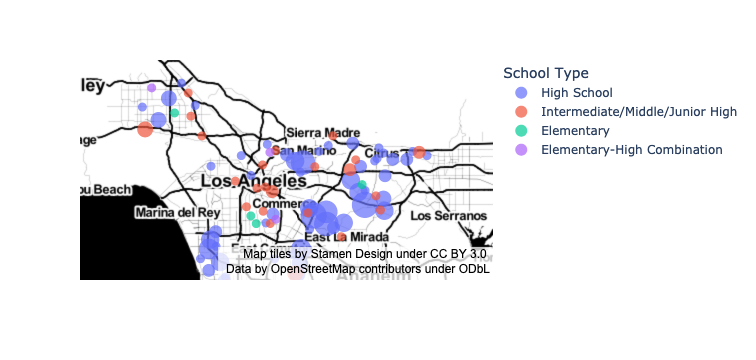

In [119]:
# for interactive plots
import plotly.express as px

fig = px.scatter_mapbox(expgdf_filtered_final,
                        lat='Latitude',
                        lon='Longitude',
                        mapbox_style="stamen-toner",
                        color="EILName",
                        labels={'EILName':'School Type'},
                       size='Total Expulsions',
                       hover_name="SchoolName")
fig.show()

Next, a bar chart of total expulsion rates for each school:

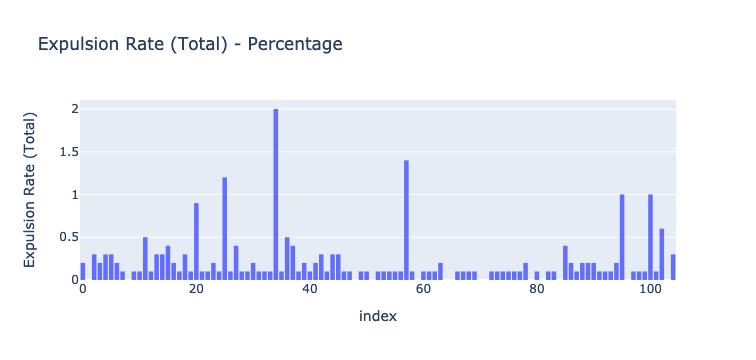

In [120]:
# a simple bar chart of expulsion rates
fig = px.bar(expgdf_filtered_final,
       y='Expulsion Rate (Total)',
       title='Expulsion Rate (Total) - Percentage'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

I also wanted to see the data broken down by expulsion reason:

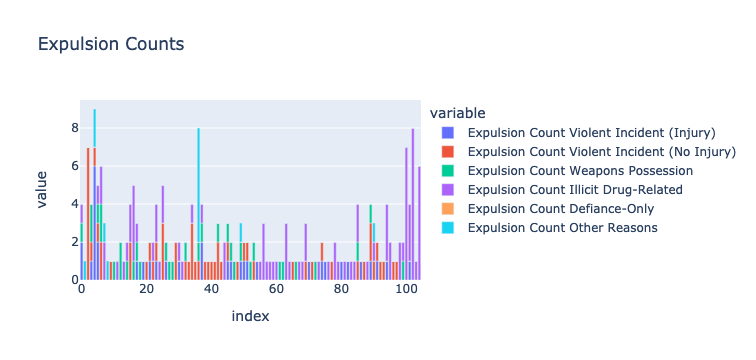

In [121]:
fig = px.bar(expgdf_filtered_final, #x="SchoolName", 
             y=["Expulsion Count Violent Incident (Injury)", 
                "Expulsion Count Violent Incident (No Injury)", 
                "Expulsion Count Weapons Possession",
                "Expulsion Count Illicit Drug-Related",
                "Expulsion Count Defiance-Only",
               "Expulsion Count Other Reasons"], title="Expulsion Counts")

fig.show()

In [122]:
print('Expulsion Count Violent Incident (Injury): ',sum(expgdf_filtered_final['Expulsion Count Violent Incident (Injury)']))
print('Expulsion Count Violent Incident (No Injury): ',sum(expgdf_filtered_final['Expulsion Count Violent Incident (No Injury)']))
print('Expulsion Count Weapons Possession: ',sum(expgdf_filtered_final['Expulsion Count Weapons Possession']))
print('Expulsion Count Illicit Drug-Related: ',sum(expgdf_filtered_final['Expulsion Count Illicit Drug-Related']))
print('Expulsion Count Defiance-Only: ',sum(expgdf_filtered_final['Expulsion Count Defiance-Only']))
print('Expulsion Count Other Reasons: ',sum(expgdf_filtered_final['Expulsion Count Other Reasons']))


Expulsion Count Violent Incident (Injury):  35
Expulsion Count Violent Incident (No Injury):  58
Expulsion Count Weapons Possession:  33
Expulsion Count Illicit Drug-Related:  89
Expulsion Count Defiance-Only:  0
Expulsion Count Other Reasons:  13
